# Global Power Plant Database Project

Submitted by: Sindhu Shree N

Batch Number: 1832

The main is to build a model using the global power plant dataset inorder to predict the capacity_mw and primary_fuel. 

In [342]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import pickle
import warnings
warnings.filterwarnings("ignore")

# Examining the data:

In [343]:
df=pd.read_csv("powerplant.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [279]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
df.sample(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
710,IND,India,SHIMSAPURA,IND0000406,17.2,12.3409,77.1906,Hydro,NaN,NaN,...,WRI,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,IND,India,Dhanera Solar Power Plant,WRI1026134,25.0,24.5216,72.1999,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,IND,India,KORADI,IND0000208,2400.0,21.2414,79.0960,Coal,Oil,NaN,...,WRI,NaN,2018.0,2066.39,2022.57,2725.69064,4875.81,8670.845796,Central Electricity Authority,NaN
14,IND,India,ANOOPGARH ST I&II,IND0000012,9.0,NaN,NaN,Hydro,NaN,NaN,...,WRI,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,IND,India,Khori Wind Farm,WRI1026668,20.8,21.1670,74.3272,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we can see the dataset contains both numerical and categorical features.

In [281]:
df.shape

(908, 25)

The dataset consists 908 rows and 25 columns.

In [282]:
#to see features
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [283]:
#checking the datatypes
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Thus the dataset is madeup off 13 float features and 12 object type features.

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [285]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

We can see that the several columns contains null values.

# Exploratory Data Analysis:

In [286]:
#summary Statistics
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


observations:
    
    1.we can observe that mean is greater than median in all the Year of the column "generation_gwh" .
    2.Their is a huge difference between 75th percentile and the maximum value in capacity_mw, generation_gwh_2013 to 2017 columns.
    3.The observation 1 and 2 suggests that will be huge number of outliers and the skewness in the curve.

In [287]:
#checking unique values
df['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1998., 1977., 1980.,
       2003., 1984., 1973., 1996., 1991., 2002., 2001., 2006., 2007.,
       1988., 2012., 1968., 1964., 2016., 2013., 1962., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 1959., 1961., 1957., 1978., 1976., 1963., 1971., 1955.,
       2018., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [288]:
df['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

Both of the above features contains many unique values.

# Data Visualization:

# Univariate Analysis:

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'other_fuel3'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'wepp_id'}>,
        <AxesSubplot:title={'center':'year_of_capacity_data'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>],
       [<AxesSubplot:title={'center':'estimated_generation_gwh'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

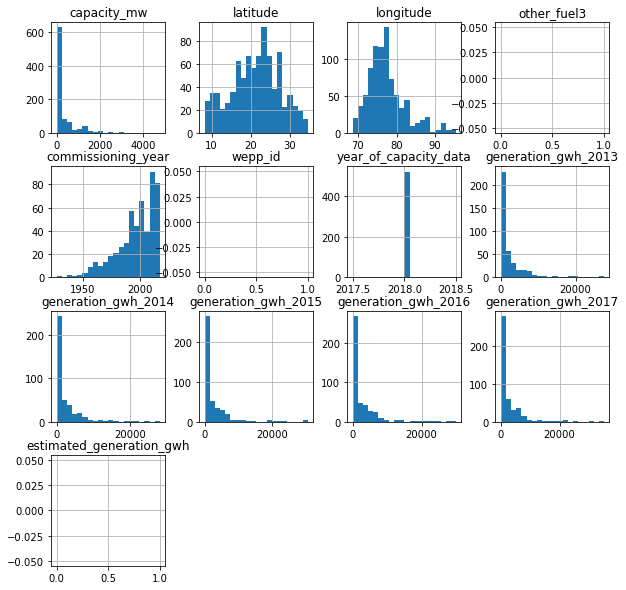

In [289]:
df.hist(bins=20,figsize=(10,10))

So we can see that all the curves are having skewness.

<AxesSubplot:xlabel='country', ylabel='count'>

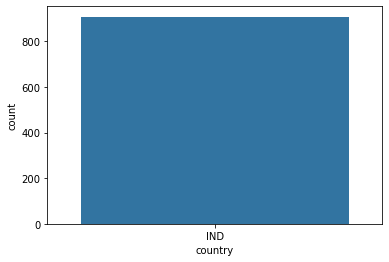

In [24]:
sb.countplot(df['country'])

<AxesSubplot:xlabel='country_long', ylabel='count'>

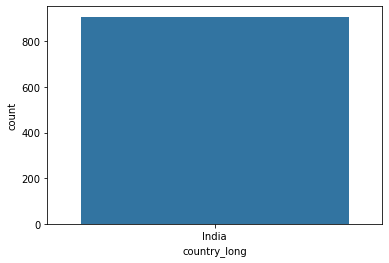

In [25]:
sb.countplot(df['country_long'])

<AxesSubplot:xlabel='gppd_idnr', ylabel='count'>

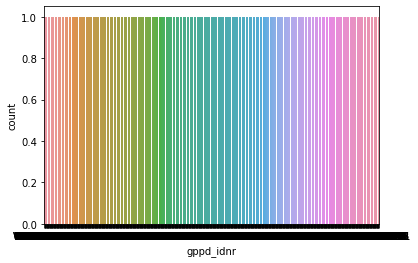

In [26]:
sb.countplot(df['gppd_idnr'])

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

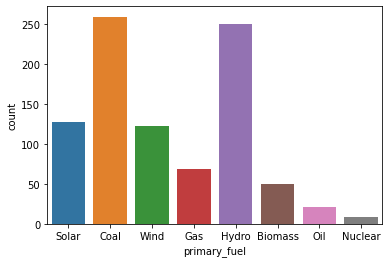

In [27]:
sb.countplot(df['primary_fuel'])

Coal is contributing more for primary_fuel and next place was took by Hydro which is also contributing much to primary_fuel.

<AxesSubplot:xlabel='owner', ylabel='count'>

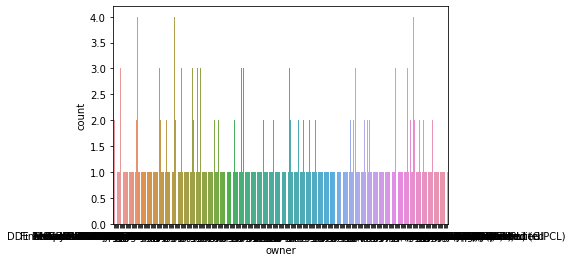

In [28]:
sb.countplot(df['owner'])

# Bivariate analysis:

<AxesSubplot:xlabel='count', ylabel='country'>

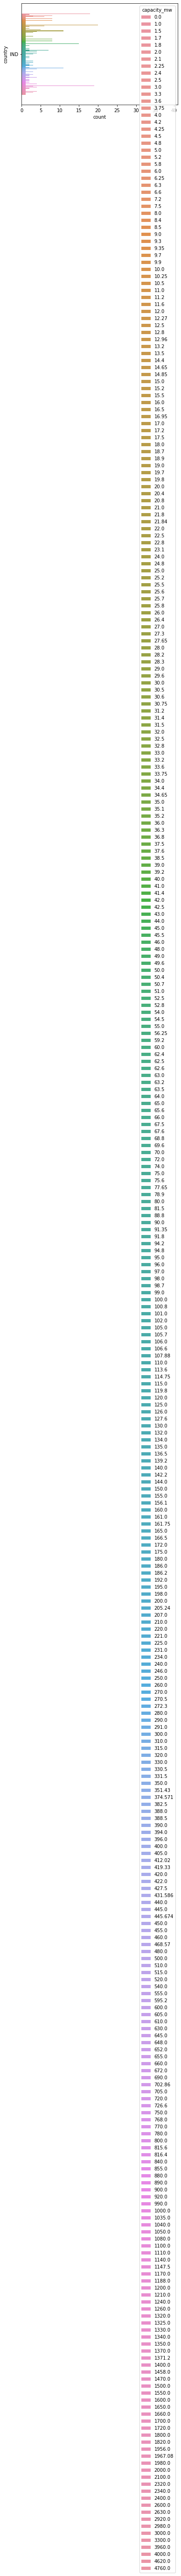

In [33]:
sb.countplot(y='country',hue='capacity_mw',data=df)

<AxesSubplot:xlabel='name', ylabel='capacity_mw'>

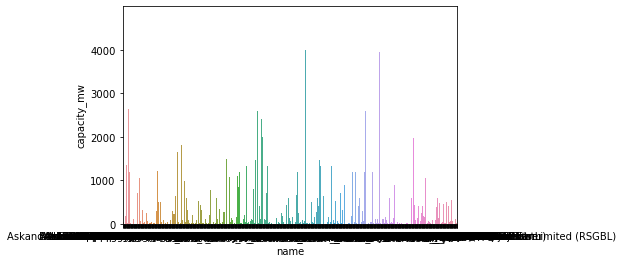

In [38]:
sb.barplot(x='name',y='capacity_mw',data=df)

<AxesSubplot:xlabel='other_fuel1', ylabel='capacity_mw'>

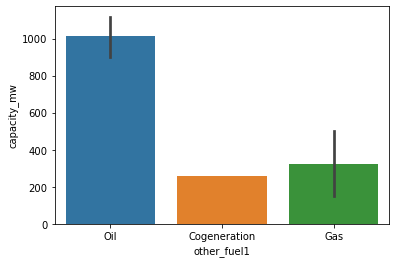

In [37]:
sb.barplot(x='other_fuel1',y='capacity_mw',data=df)

oil is contributing high to the capacity_mw.

<AxesSubplot:xlabel='other_fuel2', ylabel='capacity_mw'>

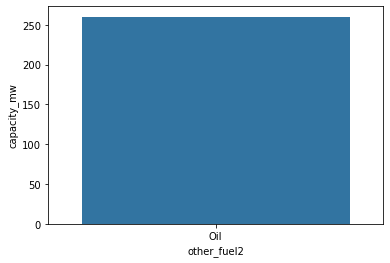

In [40]:
sb.barplot(x='other_fuel2',y='capacity_mw',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

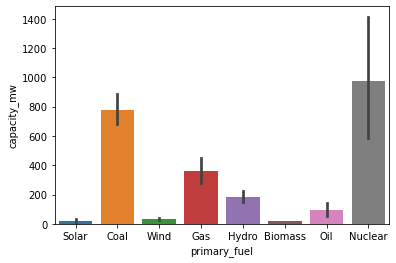

In [39]:
sb.barplot(x='primary_fuel',y='capacity_mw',data=df)

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='capacity_mw'>

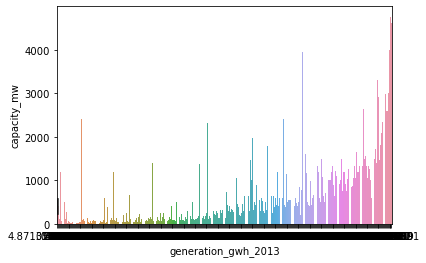

In [50]:
sb.barplot(x='generation_gwh_2013',y='capacity_mw',data=df)

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

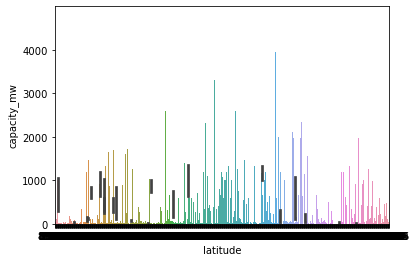

In [51]:
sb.barplot(x='latitude',y='capacity_mw',data=df)

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

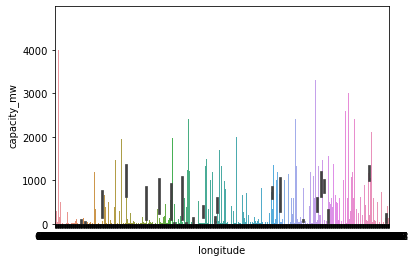

In [52]:
sb.barplot(x='longitude',y='capacity_mw',data=df)

<AxesSubplot:xlabel='commissioning_year', ylabel='primary_fuel'>

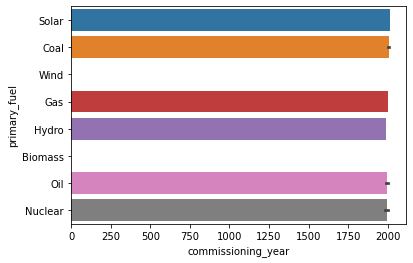

In [44]:
sb.barplot(x='commissioning_year',y='primary_fuel',data=df)

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='primary_fuel'>

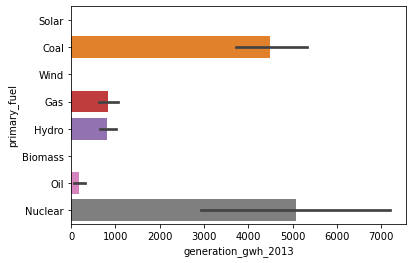

In [45]:
sb.barplot(x='generation_gwh_2013',y='primary_fuel',data=df)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='primary_fuel'>

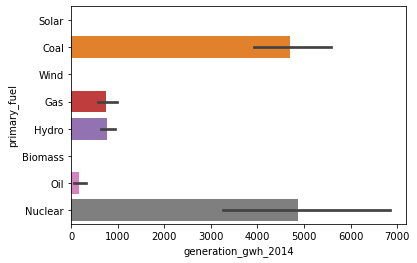

In [46]:
sb.barplot(x='generation_gwh_2014',y='primary_fuel',data=df)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='primary_fuel'>

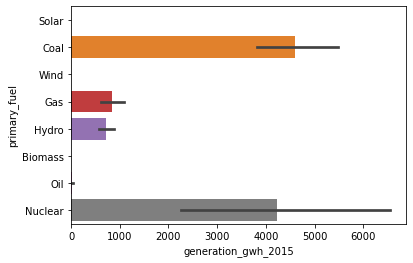

In [47]:
sb.barplot(x='generation_gwh_2015',y='primary_fuel',data=df)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='primary_fuel'>

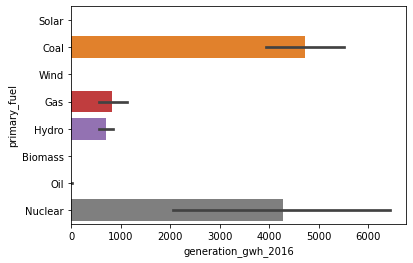

In [48]:
sb.barplot(x='generation_gwh_2016',y='primary_fuel',data=df)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='primary_fuel'>

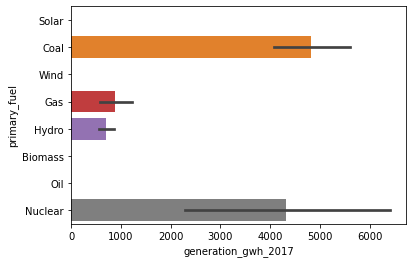

In [49]:
sb.barplot(x='generation_gwh_2017',y='primary_fuel',data=df)

<AxesSubplot:xlabel='latitude', ylabel='primary_fuel'>

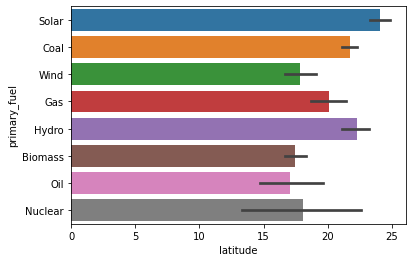

In [53]:
sb.barplot(x='latitude',y='primary_fuel',data=df)

<AxesSubplot:xlabel='longitude', ylabel='primary_fuel'>

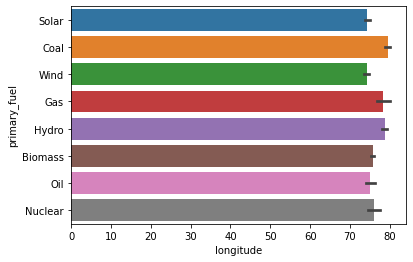

In [54]:
sb.barplot(x='longitude',y='primary_fuel',data=df)

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='capacity_mw'>

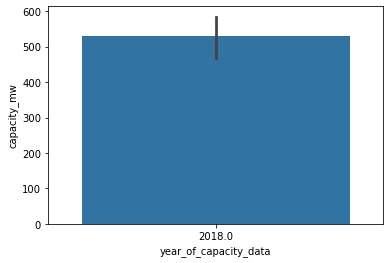

In [55]:
sb.barplot(x='year_of_capacity_data',y='capacity_mw',data=df)

# Checking distribution curves:

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

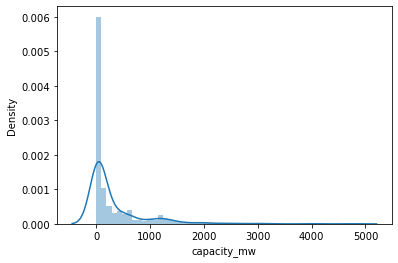

In [60]:
sb.distplot(df['capacity_mw'])

<AxesSubplot:xlabel='latitude', ylabel='Density'>

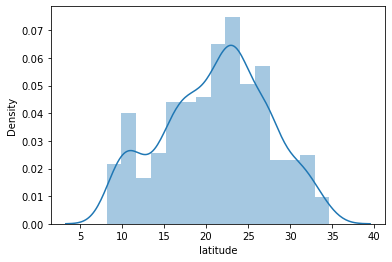

In [61]:
sb.distplot(df['latitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

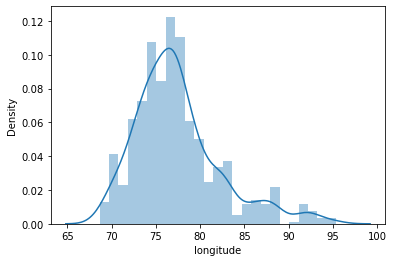

In [62]:
sb.distplot(df['longitude'])

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

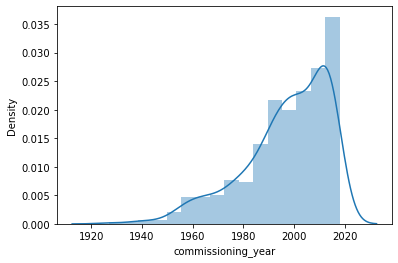

In [63]:
sb.distplot(df['commissioning_year'])

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Density'>

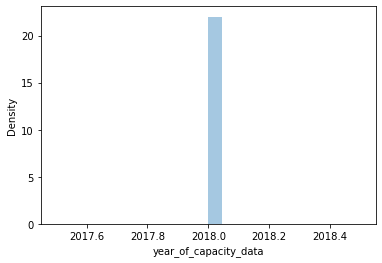

In [64]:
sb.distplot(df['year_of_capacity_data'])

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

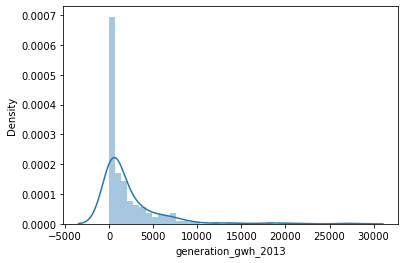

In [65]:
sb.distplot(df['generation_gwh_2013'])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

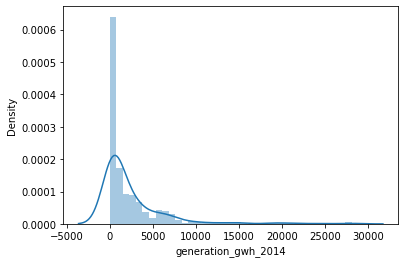

In [66]:
sb.distplot(df['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

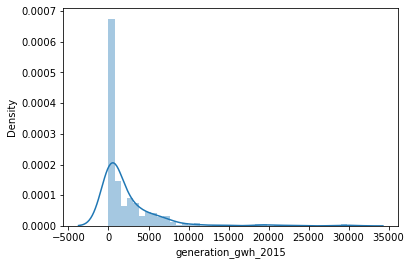

In [67]:
sb.distplot(df['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

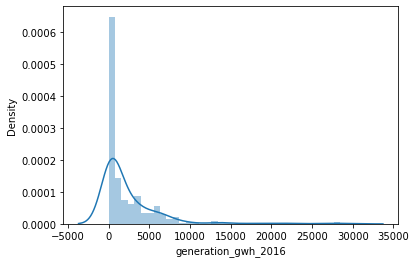

In [68]:
sb.distplot(df['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

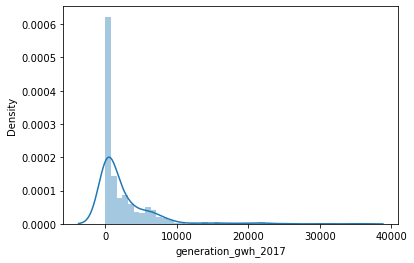

In [69]:
sb.distplot(df['generation_gwh_2017'])

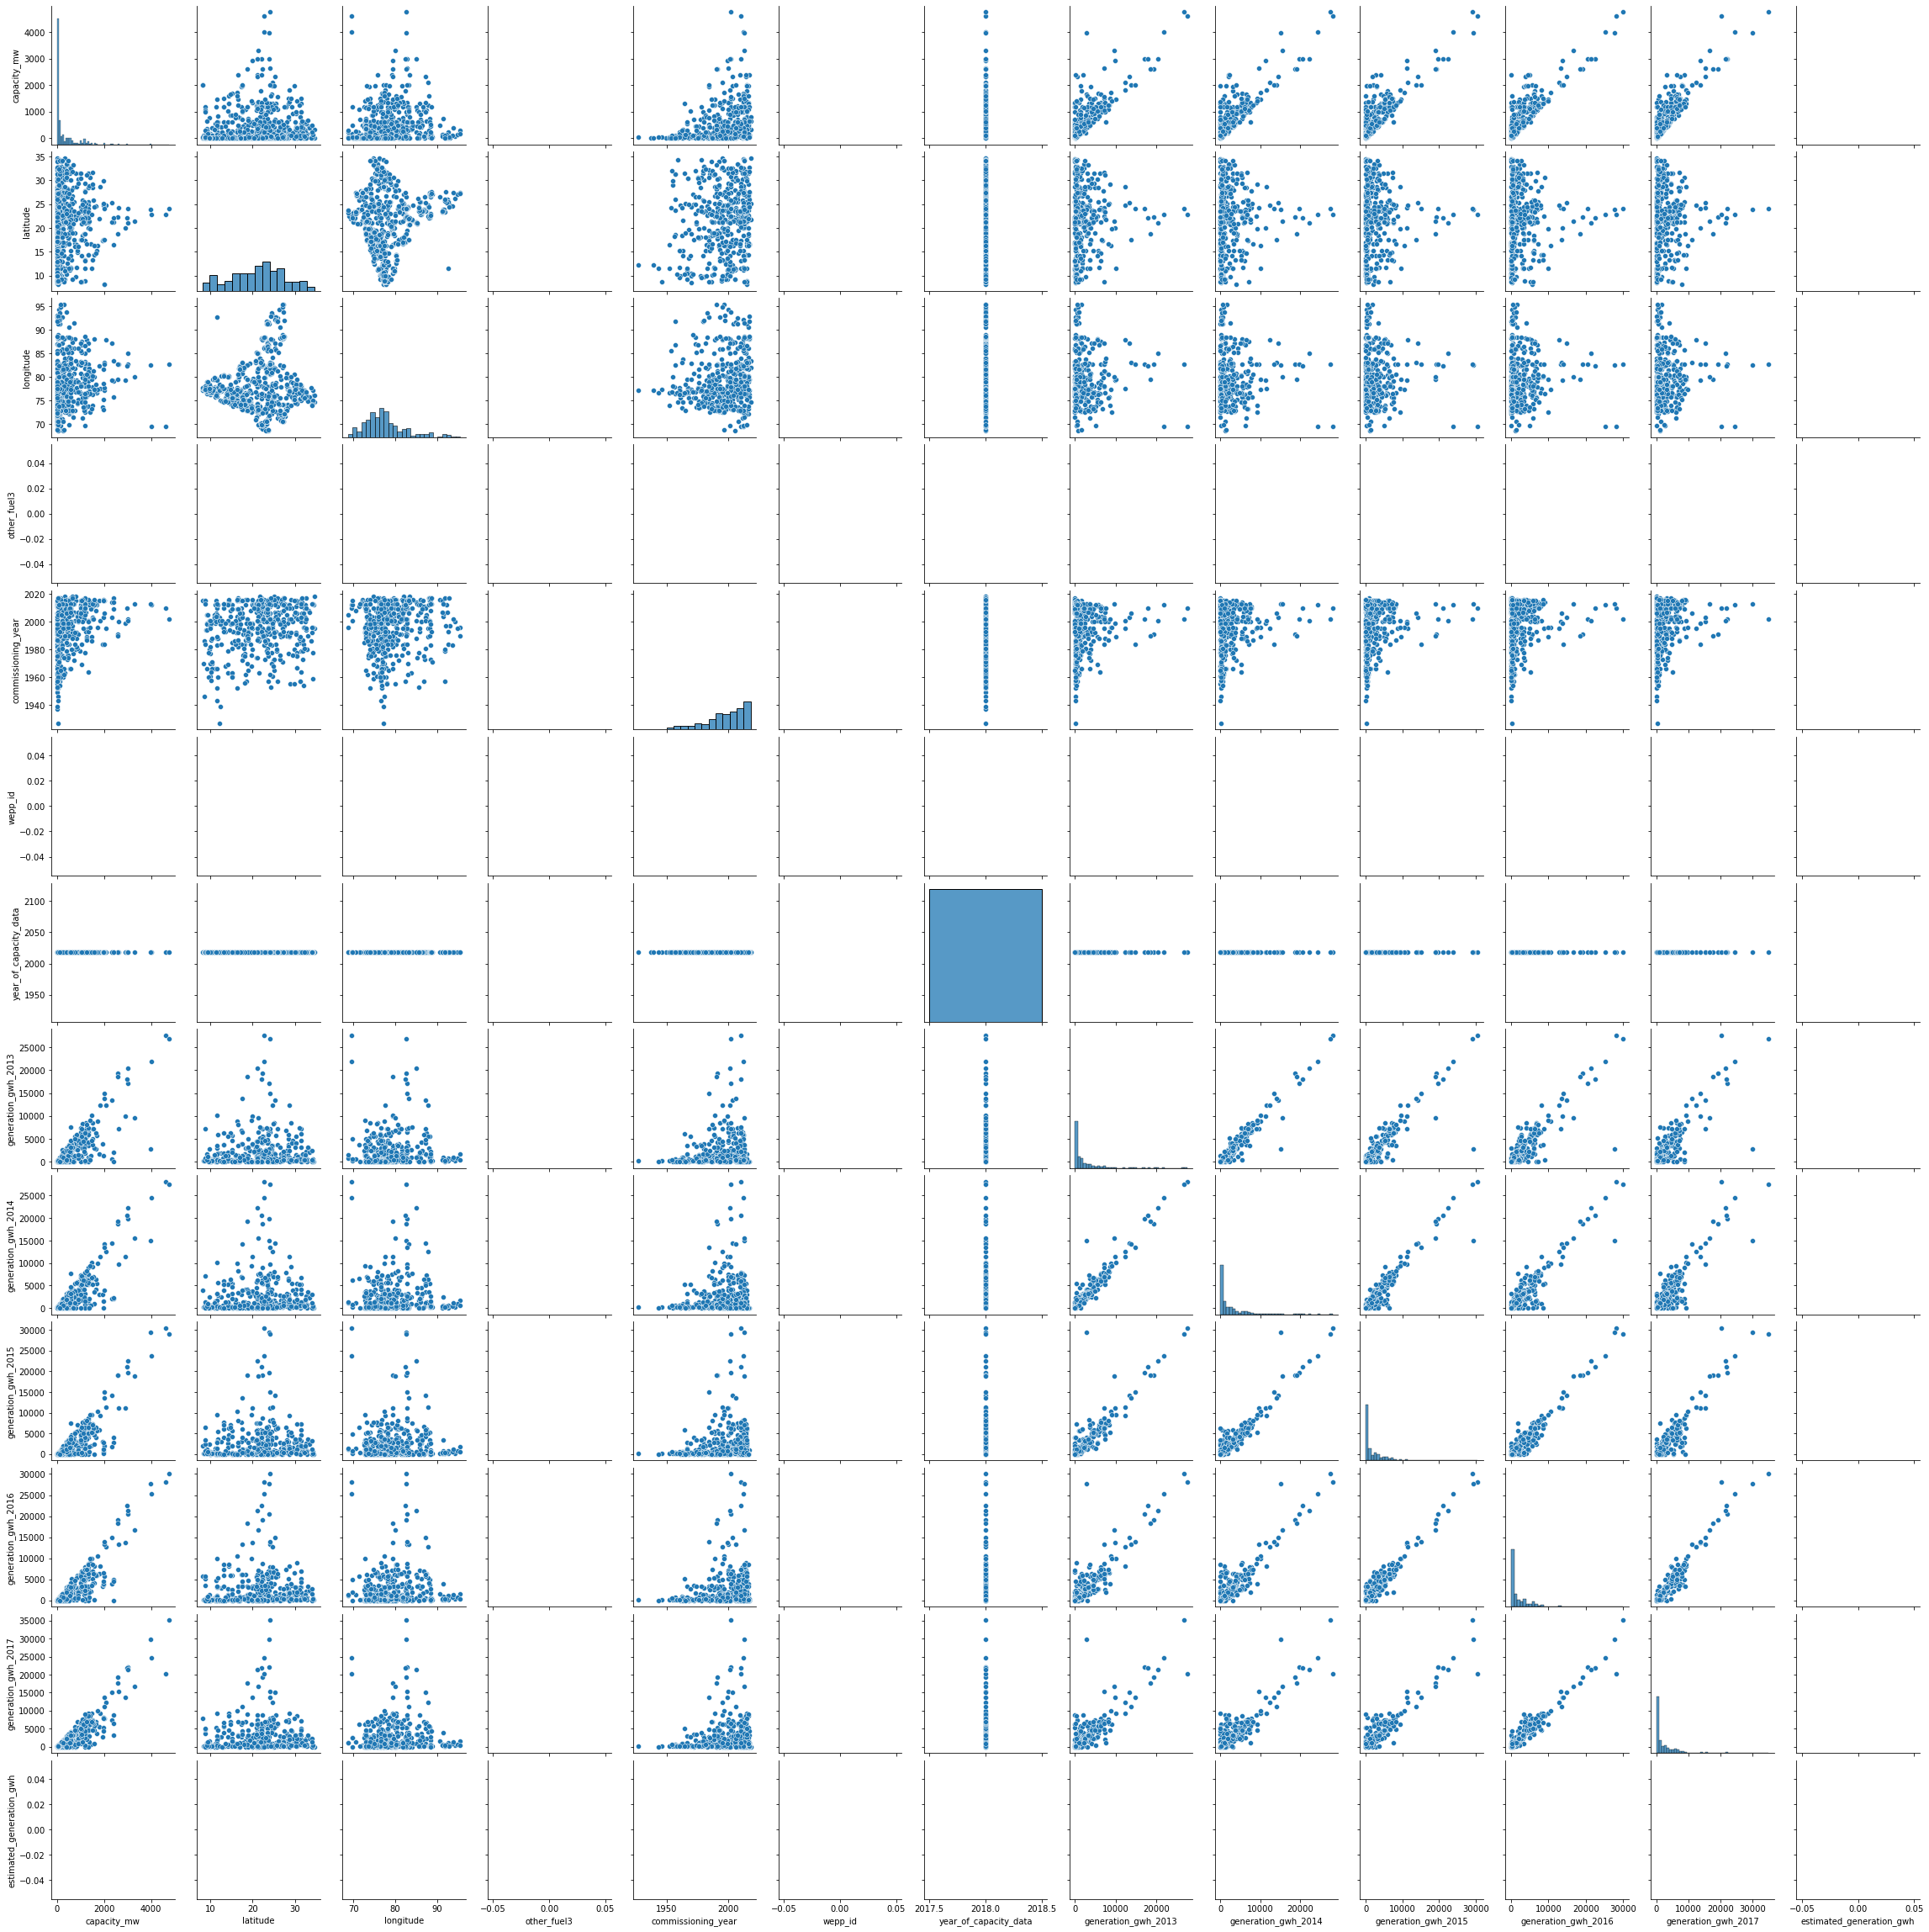

In [71]:
sb.pairplot(df)

We can observe the skewness in all of the plotted curves.

# Correlation:

In [344]:
corr=df.corr()
corr

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
capacity_mw,1.000000,0.050107,0.198377,NaN,0.294661,NaN,NaN,0.823513,0.850698,0.855834,0.881209,0.896785,NaN
latitude,0.050107,1.000000,0.031501,NaN,0.120944,NaN,NaN,0.050720,0.059826,0.048103,0.040832,0.039711,NaN
longitude,0.198377,0.031501,1.000000,NaN,0.114167,NaN,NaN,0.017461,0.013678,0.023087,0.051128,0.049320,NaN
other_fuel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,0.294661,0.120944,0.114167,NaN,1.000000,NaN,NaN,0.137351,0.160896,0.171964,0.195301,0.193421,NaN
wepp_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,0.823513,0.050720,0.017461,NaN,0.137351,NaN,NaN,1.000000,0.968904,0.908396,0.894752,0.859459,NaN
generation_gwh_2014,0.850698,0.059826,0.013678,NaN,0.160896,NaN,NaN,0.968904,1.000000,0.961105,0.937091,0.912585,NaN
generation_gwh_2015,0.855834,0.048103,0.023087,NaN,0.171964,NaN,NaN,0.908396,0.961105,1.000000,0.974955,0.940274,NaN


<AxesSubplot:>

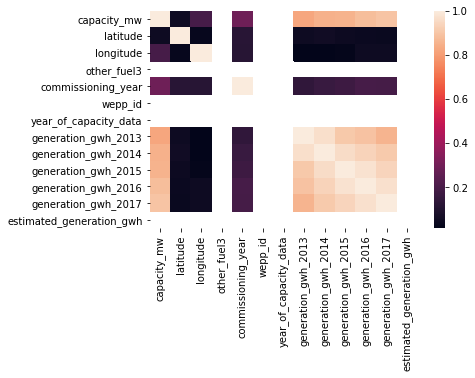

In [73]:
sb.heatmap(corr)

Dark shades shows high negative correlation and capacity_mw is having a negative correlation with the latitude. So we will drop that column later.

# Plotting Outliers:

<AxesSubplot:xlabel='capacity_mw'>

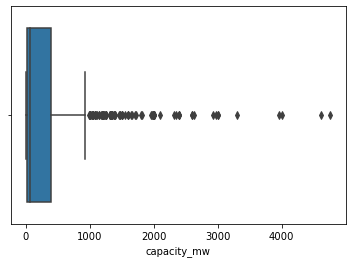

In [75]:
sb.boxplot(df['capacity_mw'])

<AxesSubplot:xlabel='latitude'>

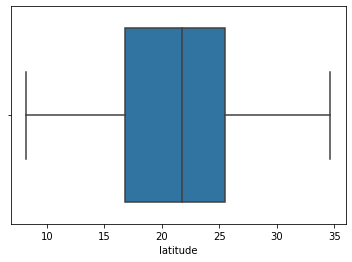

In [76]:
sb.boxplot(df['latitude'])

No outliers are lying as of observation.

<AxesSubplot:xlabel='longitude'>

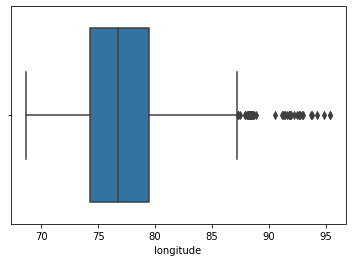

In [77]:
sb.boxplot(df['longitude'])

<AxesSubplot:xlabel='commissioning_year'>

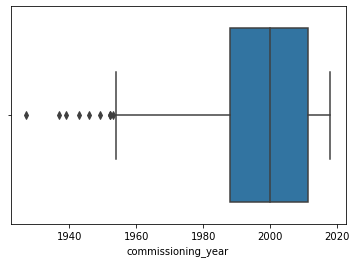

In [78]:
sb.boxplot(df['commissioning_year'])

<AxesSubplot:xlabel='generation_gwh_2013'>

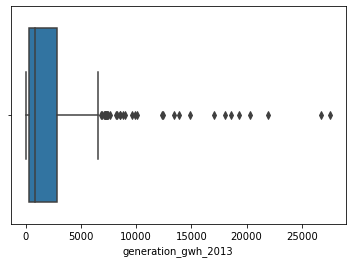

In [81]:
sb.boxplot(df['generation_gwh_2013'])

<AxesSubplot:xlabel='generation_gwh_2014'>

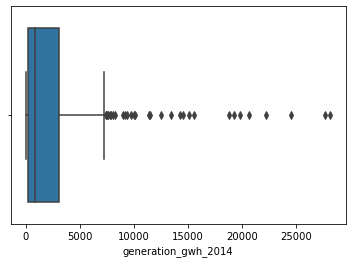

In [82]:
sb.boxplot(df['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015'>

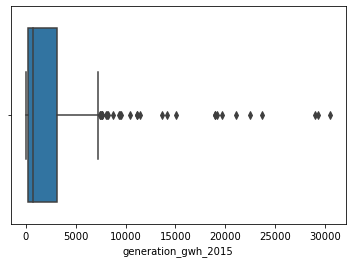

In [83]:
sb.boxplot(df['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016'>

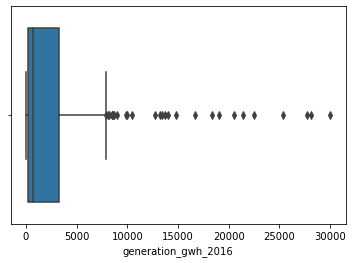

In [84]:
sb.boxplot(df['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017'>

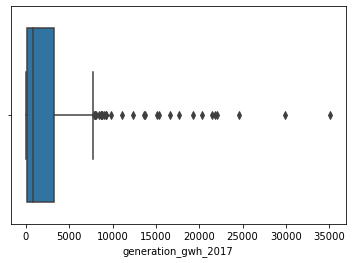

In [85]:
sb.boxplot(df['generation_gwh_2017'])

Except latitude all are having maximum number of outliers.

Since the below dropped columns are not much contributing to our target variables we will drop them.

In [345]:
df.drop(['country','country_long','other_fuel3','wepp_id','estimated_generation_gwh','url','latitude'],axis=1,inplace=True)

In [346]:
df.head()

,name,gppd_idnr,capacity_mw,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,73.2407,Solar,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,74.6090,Coal,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,69.3732,Wind,NaN,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,91.3602,Gas,NaN,NaN,2004.0,NaN,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,82.4091,Coal,Oil,NaN,2015.0,NaN,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


# Handling missing values:

<AxesSubplot:>

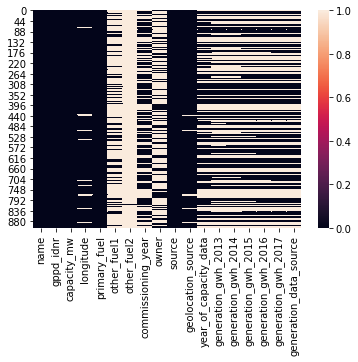

In [347]:
sb.heatmap(df.isnull())

In [348]:
df.longitude=df.longitude.fillna(df.longitude).mean()

In [349]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0],inplace=True) 

In [350]:
df['owner'].fillna(df['owner'].mode()[0],inplace=True) 

In [351]:
df.generation_gwh_2013=df.generation_gwh_2013.fillna(df.generation_gwh_2013).mean()

In [352]:
df.generation_gwh_2014=df.generation_gwh_2014.fillna(df.generation_gwh_2014).mean()

In [353]:
df.generation_gwh_2015=df.generation_gwh_2015.fillna(df.generation_gwh_2015).mean()

In [354]:
df.generation_gwh_2016=df.generation_gwh_2016.fillna(df.generation_gwh_2016).mean()

In [355]:
df.generation_gwh_2017=df.generation_gwh_2017.fillna(df.generation_gwh_2017).mean()

In [361]:
df['generation_data_source'].fillna(df['generation_data_source'].mode()[0],inplace=True) 

In [356]:
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0],inplace=True) 

In [357]:
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0],inplace=True) 

In [358]:
df['other_fuel1'].fillna(df['other_fuel1'].mode()[0],inplace=True) 

In [359]:
df['other_fuel2'].fillna(df['other_fuel2'].mode()[0],inplace=True) 

we are filling numerical features NaN values using mean and categorical features NaN values using mode function.

In [362]:
df.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

So we have successfully filled the NaN values as we can see no null values above. 

<Figure size 1584x504 with 0 Axes>

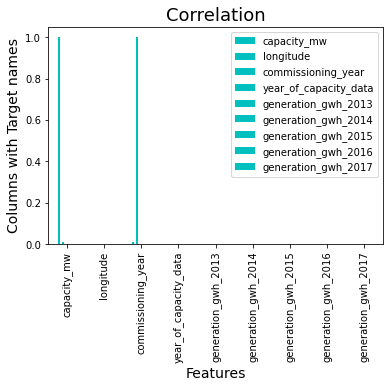

In [363]:
plt.figure(figsize=(22,7))
df.corr().plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Columns with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

# Removing Outliers:

In [365]:
z=np.abs(zscore(df[['capacity_mw','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]))
z.shape

(908, 9)

In [366]:
threshold=3
print(np.where(z>3))

(array([ 15, 144, 210, 222, 309, 343, 364, 365, 372, 376, 445, 455, 479,
       483, 485, 494, 495, 539, 542, 575, 584, 602, 622, 649, 658, 696,
       707, 710, 727, 729, 787, 789, 808, 809, 849, 881], dtype=int64), array([0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0], dtype=int64))


In [367]:
df_new=df[(z<3).all(axis=1)]

# Encoding:

In [368]:
#using labelencoder to convert categorical features into numerical features
le=LabelEncoder()
df['other_fuel1']=le.fit_transform(df['other_fuel1'])
df['other_fuel2']=le.fit_transform(df['other_fuel2'])
df['name']=le.fit_transform(df['name'])
df['gppd_idnr']=le.fit_transform(df['gppd_idnr'])
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df['owner']=le.fit_transform(df['owner'])
df['source']=le.fit_transform(df['source'])
df['geolocation_source']=le.fit_transform(df['geolocation_source'])
df['generation_data_source']=le.fit_transform(df['generation_data_source'])
df.head()

,name,gppd_idnr,capacity_mw,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,658,2.5,77.447848,6,2,0,2011.0,229,109,1,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
1,1,520,98.0,77.447848,1,2,0,2013.0,258,174,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
2,2,854,39.2,77.447848,7,2,0,2013.0,2,21,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
3,3,0,135.0,77.447848,2,2,0,2004.0,5,22,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
4,4,1,1800.0,77.447848,1,2,0,2015.0,5,22,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0


In [377]:
df.drop(['generation_data_source','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016'],axis=1,inplace=True)

In [393]:
df.drop(['owner','geolocation_source','commissioning_year'],axis=1,inplace=True)

Since these features are not much contributing to our label feature.

In [394]:
df.head()

,name,gppd_idnr,capacity_mw,longitude,primary_fuel,other_fuel1,other_fuel2,source,year_of_capacity_data,generation_gwh_2017
0,0,658,2.5,77.447848,6,2,0,109,2018.0,2531.754458
1,1,520,98.0,77.447848,1,2,0,174,2018.0,2531.754458
2,2,854,39.2,77.447848,7,2,0,21,2018.0,2531.754458
3,3,0,135.0,77.447848,2,2,0,22,2018.0,2531.754458
4,4,1,1800.0,77.447848,1,2,0,22,2018.0,2531.754458


# Feature Engineering:

In [395]:
#using Standardscaler to scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Scaled=scaler.fit_transform(df)

In [396]:
Scaled

array([[-1.73014431,  0.78018635, -0.54931054, ...,  1.461366  ,
         0.        ,  0.        ],
       [-1.72632922,  0.25370363, -0.38462759, ...,  2.91878103,
         0.        ,  0.        ],
       [-1.72251413,  1.52794443, -0.48602401, ..., -0.51174973,
         0.        ,  0.        ],
       ...,
       [ 1.72251413,  1.67291793, -0.50964868, ..., -0.51174973,
         0.        ,  0.        ],
       [ 1.72632922,  0.33000548, -0.41566731, ...,  0.34027752,
         0.        ,  0.        ],
       [ 1.73014431,  1.61569155, -0.52516854, ..., -0.51174973,
         0.        ,  0.        ]])

In [397]:
df.skew()

name                      0.000000
gppd_idnr                 0.000000
capacity_mw               3.193257
longitude                 0.000000
primary_fuel              0.471141
other_fuel1             -20.464435
other_fuel2               0.000000
source                    1.829145
year_of_capacity_data     0.000000
generation_gwh_2017       0.000000
dtype: float64

Firstly keeping "capacity_mw" as a target feature

In [458]:
x=df.drop('capacity_mw',axis=1)
y=df['capacity_mw']

# Removing skewness:

In [459]:
from sklearn.preprocessing import power_transform
power_transform(x,method='yeo-johnson')

array([[-2.16563854,  0.79151775,  0.        , ...,  1.5838851 ,
         0.        ,  0.        ],
       [-2.14666836,  0.33280729,  0.        , ...,  2.03769516,
         0.        ,  0.        ],
       [-2.13039044,  1.39764072,  0.        , ..., -0.47157869,
         0.        ,  0.        ],
       ...,
       [ 1.54843229,  1.5102347 ,  0.        , ..., -0.47157869,
         0.        ,  0.        ],
       [ 1.55136394,  0.40129562,  0.        , ...,  0.90566298,
         0.        ,  0.        ],
       [ 1.55429466,  1.46595925,  0.        , ..., -0.47157869,
         0.        ,  0.        ]])

Since our target feature is a numeric datatype before encoding itself so we will use regression algorithms.

# Regression Models:

In [460]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.model_selection import train_test_split

Decision Tree Regressor:

In [461]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [462]:
y_pred = dt.predict(x_test)
y_pred

array([1., 3., 3., 3., 3., 3., 1., 6., 7., 3., 1., 2., 1., 7., 0., 1., 2.,
       6., 4., 3., 3., 1., 3., 1., 3., 7., 1., 1., 2., 7., 1., 7., 7., 1.,
       3., 1., 1., 1., 7., 5., 1., 6., 2., 3., 6., 3., 5., 7., 1., 4., 0.,
       2., 3., 0., 3., 6., 3., 1., 3., 6., 1., 3., 7., 1., 2., 1., 3., 1.,
       5., 6., 1., 1., 1., 1., 4., 6., 3., 2., 0., 1., 3., 3., 3., 3., 7.,
       7., 7., 3., 1., 6., 1., 1., 1., 6., 1., 4., 7., 1., 1., 5., 3., 1.,
       7., 3., 2., 6., 6., 7., 6., 3., 6., 3., 1., 0., 1., 3., 1., 7., 3.,
       1., 3., 3., 3., 6., 1., 3., 1., 7., 2., 3., 1., 1., 3., 6., 3., 6.,
       3., 6., 1., 7., 3., 7., 3., 7., 3., 3., 7., 3., 2., 2., 2., 3., 2.,
       1., 1., 0., 2., 2., 1., 3., 2., 3., 3., 1., 1., 3., 2., 3., 0., 1.,
       1., 6., 7., 7., 3., 7., 3., 3., 3., 1., 3., 6.])

In [463]:
dt_accuracy = round(dt.score(x_train,y_train)*100,2)
print(dt_accuracy,"%")

100.0 %


Random Forest Regressor:

In [464]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [465]:
rf_accuracy = round(rf.score(x_train,y_train)*100,2)
rf_accuracy

90.16

In [406]:
rf_test_accuracy = round(rf.score(x_test,y_test)*100,2)
rf_test_accuracy

85.32

Gradient Boost Regressor:

In [407]:
from sklearn.ensemble import GradientBoostingRegressor

In [411]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [412]:
y_train_pred = gbr.predict(x_train)
y_test_pred = gbr.predict(x_test)

In [415]:
gbr.score(x_train,y_train)

0.7169309189730394

In [417]:
gbr.score(x_test, y_test)*100

71.44391666683106

# Cross Validation score:

In [422]:
print(cross_val_score(rf,x,y,cv=5).mean()*100)

79.05717591410276


In [424]:
print(cross_val_score(gbr,x,y,cv=5).mean()*100)

81.21719109021778


The cross validation score and accuracy score of Random forest regressor are nearby when compare to other models so we will choose it for tuning.

# Hyper Parameter Tuning:

In [466]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['squared_error','poisson'],
           'n_estimators':[100],
           'bootstrap':[True],
           'max_depth':[2,6],
           'min_samples_split':[2,3]}
grid=GridSearchCV(estimator=rf, param_grid=parameters,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True],
                         'criterion': ['squared_error', 'poisson'],
                         'max_depth': [2, 6], 'min_samples_split': [2, 3],
                         'n_estimators': [100]})

In [467]:
best_parameters=grid.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'poisson', 'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 100}


The train and test data are balanced with the accuracy of 79%.

Keeping primary_fuel as the target feature and it is a categorical dtype we will use the classification algorithms.

In [428]:
x=df.drop('primary_fuel',axis=1)
y=df['primary_fuel']

Using Classification algorithms:

Decision Tree Classifier:

In [431]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,"at random_state", i)

72.66666666666667 at random_state 0
66.66666666666666 at random_state 1
68.33333333333333 at random_state 2
69.0 at random_state 3
68.0 at random_state 4
68.33333333333333 at random_state 5
70.0 at random_state 6
71.66666666666667 at random_state 7
74.33333333333333 at random_state 8
69.0 at random_state 9
75.0 at random_state 10
77.33333333333333 at random_state 11
71.33333333333334 at random_state 12
71.66666666666667 at random_state 13
72.33333333333334 at random_state 14
73.33333333333333 at random_state 15
78.33333333333333 at random_state 16
70.66666666666667 at random_state 17
73.0 at random_state 18
69.33333333333334 at random_state 19
71.0 at random_state 20
77.33333333333333 at random_state 21
72.66666666666667 at random_state 22
70.0 at random_state 23
73.66666666666667 at random_state 24
69.33333333333334 at random_state 25
69.66666666666667 at random_state 26
73.66666666666667 at random_state 27
74.0 at random_state 28
66.0 at random_state 29
72.66666666666667 at random_st

In [432]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=11)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1
print("Best accuracy is",maxAccu," on Random_state",maxRS)

Best accuracy is 0.7802197802197802  on Random_state 1


In [435]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier: \n\n",classification_report(y_test,y_pred_dt))
print("Test Accuracy Of Decision Tree Classifier is:{}%".format(round(dt.score(x_test,y_test)*100,2)))
print("Confusion Matrix of Decision Tree Classifier:\n\n",confusion_matrix(y_test,y_pred_dt))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.84      0.72      0.78        58
           2       0.15      0.33      0.21         6
           3       0.74      0.80      0.77        56
           4       0.25      1.00      0.40         1
           5       0.33      0.12      0.18         8
           6       1.00      0.95      0.98        21
           7       1.00      1.00      1.00        24

    accuracy                           0.76       182
   macro avg       0.61      0.68      0.61       182
weighted avg       0.79      0.76      0.77       182

Test Accuracy Of Decision Tree Classifier is:76.37%
Confusion Matrix of Decision Tree Classifier:

 [[ 4  4  0  0  0  0  0  0]
 [ 1 42  4  9  2  0  0  0]
 [ 0  1  2  3  0  0  0  0]
 [ 0  3  5 45  1  2  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 2  0  1  4  0  1  0  0]
 [ 0  0  1  0  0  0 20  0]
 [ 0  0  0  0  0  0  0 24]]


GaussianNB Classifier:

In [442]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
print(" Navie byes Classifier: \n\n",classification_report(y_test,y_pred_nb))
print("Test Accuracy:{}%".format(round(nb.score(x_test,y_test)*100,2)))
print("Confusion Matrix of Decision Tree Classifier:\n\n",confusion_matrix(y_test,y_pred_dt))

 Navie byes Classifier: 

               precision    recall  f1-score   support

           0       0.50      1.00      0.67         8
           1       1.00      0.09      0.16        58
           2       0.00      0.00      0.00         6
           3       0.53      1.00      0.70        56
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       1.00      0.95      0.98        21
           7       1.00      1.00      1.00        24

    accuracy                           0.62       182
   macro avg       0.50      0.50      0.44       182
weighted avg       0.75      0.62      0.54       182

Test Accuracy:62.09%
Confusion Matrix of Decision Tree Classifier:

 [[ 4  4  0  0  0  0  0  0]
 [ 1 42  4  9  2  0  0  0]
 [ 0  1  2  3  0  0  0  0]
 [ 0  3  5 45  1  2  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 2  0  1  4  0  1  0  0]
 [ 0  0  1  0  0  0 20  0]
 [ 0  0  0  0  0  0  0 24]]


Random Forest Classifier:

In [443]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print(" Random Forest Classifier: \n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy:{}%".format(round(rf.score(x_test,y_test)*100,2)))

 Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.78      0.72      0.75        58
           2       0.00      0.00      0.00         6
           3       0.67      0.84      0.75        56
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        24

    accuracy                           0.76       182
   macro avg       0.52      0.52      0.52       182
weighted avg       0.73      0.76      0.75       182

Test Accuracy:76.37%


# Cross Validation score:

In [444]:
print("DecisionTreeClassifier cross validation score:",cross_val_score(dt,x,y,cv=5).mean()*100)

DecisionTreeClassifier cross validation score: 69.06259486369983


In [445]:
print("Random Forest Classifier cross validation score:",cross_val_score(rf,x,y,cv=5).mean()*100)

Random Forest Classifier cross validation score: 73.68283650051606


The cross validation score of Random Forest Classifier is higher than the decision tree classifier and it is almost near to the accuracy score so we will consider RandomForestClassifier for further tuning.

# Hyper parameter tuning:

In [446]:
from sklearn.model_selection import GridSearchCV

In [447]:
#we are tuning five hyperparameters right now are we are passing different values to it
parameters={'bootstrap':[True],
            'max_depth':[5,6],
            'max_features':['auto','sqrt'],
            'n_estimators':[200,300],
            'criterion':['gini','entropy']}
            
grid=GridSearchCV(estimator=rf, param_grid=parameters,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6], 'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

In [448]:
best_parameters=grid.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 300}


In [450]:
(grid.best_score_)*100

77.68729333963155

In [449]:
clf=RandomForestClassifier(bootstrap=True,criterion='gini',max_depth=5,max_features='auto',n_estimators=300)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=300)

In [451]:
clf.score(x_test,y_test)*100

80.21978021978022

Thus we obtained the test score as 80% which has an improvement.

# Further evaluation:

In [454]:
Final_mod = RandomForestClassifier()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((rf.score(x_test,y_test)*100))

76.37362637362637


# Saving the best model:

In [455]:
import pickle
filename = 'Finalmodel.pkl'
pickle.dump(Final_mod, open(filename,"wb"))
print("Model saved")

Model saved


# Conclusion:

In [457]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
preds = rf.predict(x_test)
print('Predicted primary_fuel:',preds[:36])
print('Actual primary_fuel   :', y_test[:36].values)

Predicted primary_fuel: [5 3 3 3 3 3 1 6 7 1 1 2 0 7 1 1 3 6 1 3 3 1 1 1 3 7 1 1 3 7 1 7 7 1 3 1]
Actual primary_fuel   : [1 3 3 3 3 3 1 6 7 3 1 3 1 7 5 1 3 6 3 1 3 1 1 1 3 7 1 1 3 7 1 7 7 0 3 1]


Thus our train and test data are balanced with the accuracy of 80%.

Hence the in both regressor and the classification algorithms the RandomForest is performing well. So it is a perfect fit for our present dataset.